In [5]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re
import zipfile
import PIL.Image as Image
from tqdm import tqdm
from IPython.display import HTML
import base64

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torchvision.transforms as transforms
from torchvision import datasets


training_path = 'bird_dataset/train_images/'
bird_classes = os.listdir(training_path)
n_classes = len(bird_classes)
sample_class = np.random.choice(bird_classes)

args_batch_size = 200

data_transforms = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


# parameters
train_loader = torch.utils.data.DataLoader(
                 datasets.ImageFolder(training_path,
                 transform=data_transforms),
                 batch_size=args_batch_size, 
                 shuffle=True, 
                 num_workers=0)



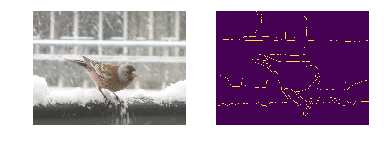

In [22]:
import cv2
import matplotlib.pyplot as plt
from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter
from skimage import img_as_ubyte
import glob
%matplotlib inline

def random_images(training_path):
    bird_classes = glob.glob(os.path.join(training_path, '*'))
    sample_class = np.random.choice(bird_classes)

    birds = glob.glob(os.path.join(sample_class, '*.jpg'))
    sample = np.random.choice(birds)
    img = cv2.imread(sample)[..., ::-1]
    
    return img

plt.figure()

plt.subplot(121)
img1 = random_images(training_path)
plt.imshow(img1)
plt.axis('off')

def bird_segmentation(img):
    gray = color.rgb2gray(img)
    edges = canny(gray, sigma=3, low_threshold=0.1, high_threshold=0.3)
    return edges

plt.subplot(122)
segmentation = bird_segmentation(img1)
plt.imshow(segmentation)
plt.axis('off')

plt.show()

In [16]:
path = "bird_dataset/train_images/bird_dataset/train_images/030.Fish_Crow"
print(os.listdir(path))

FileNotFoundError: [Errno 2] No such file or directory: 'bird_dataset/train_images/bird_dataset/train_images/030.Fish_Crow'

# Image Resolution

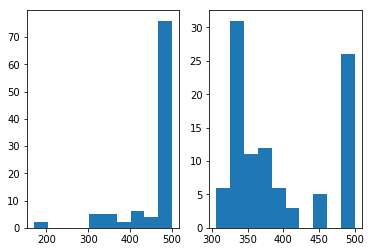

In [24]:
N = 100
h = np.zeros(N)
w = np.zeros(N)
for i in range(N):
    resolution = random_images(training_path).shape
    h[i] = resolution[1]
    w[i] = resolution[0]
    
plt.figure()
plt.subplot(121)
plt.hist(h)

plt.subplot(122)
plt.hist(w)
plt.show()